

<p align="center">
  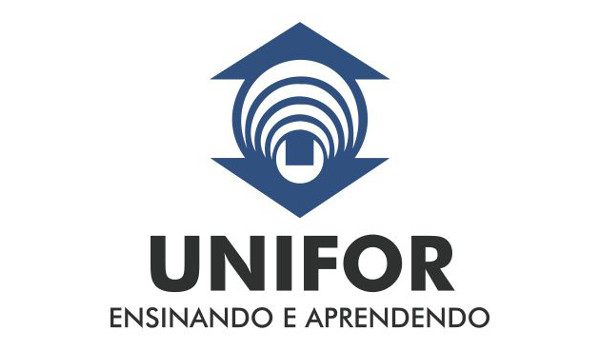</p>
<h1 style='text-align: center;'>UNIFOR - Universidade de Fortaleza</h1>
<h2 style='text-align: center;'>MBA EM CIÊCIA DE DADOS - INTRODUÇÃO A MACHINE LEARNING </h2>
<h4 style='text-align: center;'>PROF. ERNESON A. OLIVEIRA </h4>
<h4 style='text-align: center;'>JOSÉ VALCLEMIR RODRIGUES DA SILVA</h4>
<br><br>
<h4 style='text-align: center;'>Fortaleza-Ceará</h4>



## Liga NBA

### O Basketball, assim como outros esportes, é um dos esportes que mais bem paga no mundo. Um estudo feito pela Sportingintelligence, mostra que, na média, os jogadores mais bem pagos do mundo estão na NBA. A tabela abaixo, mostra a classificação dos times que mais bem pagam no mundo, na qual faz uma comparação com o as ligas do futebol.

<p align="center">
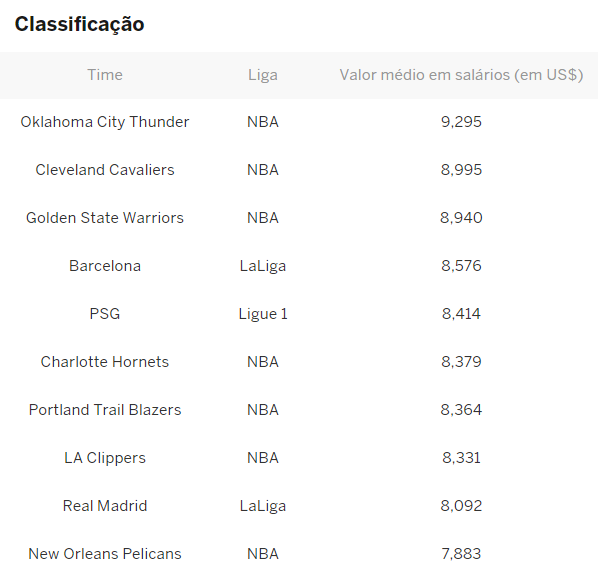</p>


### Dado o dataset NBA_players, que encontra-se no link: https://www.kaggle.com/justinas/nba-players-data.
###  jogador mais bem pago do dataset em questão, chama-se Stepen Curry, o salario dele, é justo?

### Isso nós iremos descobrir com o estudo feito abaixo.

###  Importando bibliotecas

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.impute import SimpleImputer
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from warnings import simplefilter
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split , KFold, cross_val_score
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn import svm, linear_model, metrics
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
import seaborn as sns


import plotly.offline as py
py.init_notebook_mode(connected=True)


simplefilter('ignore')
#le = preprocessing.LabelEncoder()

###  Lendo os dados

In [2]:
df = pd.read_csv('NBA_Players.csv')

In [3]:
lista_variaveis_dicionario = []
file = open ('dict.txt', 'r')
lista_variaveis_dicionario = file.readlines()

In [4]:
lista_variaveis_dicionario

['3P%:3-Point Field Goal Percentage\n',
 '3PT:3-Point Field Goals Made-Attempted Per Game\n',
 'AST:Assists Per Game\n',
 'AST/TO:Assist To Turnover Ratio\n',
 'BLK:Blocks Per Game\n',
 'DD2:Double Double\n',
 'DQ:Disqualifications\n',
 'DR:Defensive Rebounds Per Game\n',
 'EJECT:Ejections\n',
 'FG:Field Goals Made-Attempted Per Game\n',
 'FG%:Field Goal Percentage\n',
 'FLAG:Flagrant Fouls\n',
 'FT:Free Throws Made-Attempted Per Game\n',
 'FT%:Free Throw Percentage\n',
 'GP:Games Played\n',
 'GS:Games Started\n',
 'MIN:Minutes Per Game\n',
 'OR:Offensive Rebounds Per Game\n',
 'PF:Fouls Per Game\n',
 'PTS:Points Per Game\n',
 'RAT:Rating\n',
 'REB:Rebounds Per Game\n',
 'SC-EFF:Scoring Efficiency\n',
 'SH-EFF:Shooting Efficiency\n',
 'STL:Steals Per Game\n',
 'STL/TO:Steal To Turnover Ratio\n',
 'TD3:Triple Double\n',
 'TECH:Technical Fouls\n',
 'TO:Turnovers Per Game\n']

###  Tratando os dados

In [5]:
df.columns = df.columns.str.replace(' ', '')

In [6]:
df.head()

,TEAM,NAME,EXPERIENCE,URL,POSITION,AGE,HT,WT,COLLEGE,SALARY,...,FGP,THM_THA,THP,FTM_FTA,FTP,APG,BLKPG,STLPG,TOPG,PPG
0,Boston Celtics,Aron Baynes,6,http://www.espn.com/nba/player/_/id/2968439,SF,31,208.28,117.65,Washington State,"5,193,600",...,0.502,0.0-0.1,0.143,1.0-1.3,0.802,0.7,0.5,0.2,0.8,5.4
1,Boston Celtics,Justin Bibbs,0,http://www.espn.com/nba/player/_/id/3147500,G,22,195.58,99.55,Virginia Tech,Not signed,...,0.000,0,0.000,0,0.000,0.0,0.0,0.0,0.0,0.0
2,Boston Celtics,Jabari Bird,1,http://www.espn.com/nba/player/_/id/3064308,SG,24,198.12,89.59,California,"1,349,464",...,0.577,0.2-0.5,0.429,0.5-1.0,0.462,0.6,0.1,0.2,0.6,3.0
3,Boston Celtics,Jaylen Brown,2,http://www.espn.com/nba/player/_/id/3917376,F,21,200.66,99.55,California,"5,169,960",...,0.461,1.1-3.0,0.379,1.6-2.4,0.658,1.2,0.3,0.7,1.3,10.4
4,Boston Celtics,PJ Dozier,1,http://www.espn.com/nba/player/_/id/3923250,PG,21,198.12,92.76,South Carolina,Not signed,...,0.500,0.0-0.0,0.000,0.0-0.0,0.000,0.0,0.0,0.0,0.5,1.0


#### Engenharia de features (Transforma uma feature em duas)

In [7]:
#Transforma uma variável em duas 

df['SALARY'] = df['SALARY'].str.replace(',', '').replace('Not signed', np.nan).astype(float)
df['AGE'] = df['AGE'].str.replace('-', '0')
df['AGE'] = df['AGE'].astype(int).replace(0, df['AGE'].median())

df['THM'] = [i[0] for i in df['THM_THA'].str.split('-')]

lista_tha = []
for i in df['THM_THA'].str.split('-'):
    try:
        lista_tha.append(i[1])
    except:
        lista_tha.append(0)

df['THA'] = lista_tha

#FTA: Average Free Throws Attempted
#FTM: Average Free Throws Made
df['FTM'] = [i[0] for i in df['FTM_FTA'].str.split('-')]

lista_fta = []
for i in df['FTM_FTA'].str.split('-'):
    try:
        lista_fta.append(i[1])
    except:
        lista_fta.append(0)
df['FTA'] = lista_fta


df['FGM'] = [i[0] for i in df['FGM_FGA'].str.split('-')]

lista_fga = []
for i in df['FGM_FGA'].str.split('-'):
    try:
        lista_fga.append(i[1])
    except:
        lista_fga.append(0)
        
df['FGA'] = lista_fga


In [8]:
df.sort_values('SALARY', ascending=False)

,TEAM,NAME,EXPERIENCE,URL,POSITION,AGE,HT,WT,COLLEGE,SALARY,...,BLKPG,STLPG,TOPG,PPG,THM,THA,FTM,FTA,FGM,FGA
103,Golden State Warriors,Stephen Curry,9,http://www.espn.com/nba/player/_/id/3975,PG,30,190.50,85.97,Davidson,37457154.0,...,0.2,1.8,3.2,23.1,3.4,7.8,3.6,4.0,8.0,16.8
310,Houston Rockets,Chris Paul,13,http://www.espn.com/nba/player/_/id/2779,PG,33,182.88,79.19,Wake Forest,35654150.0,...,0.1,2.3,2.4,18.7,1.3,3.4,4.3,4.9,6.6,13.9
510,Oklahoma City Thunder,Russell Westbrook,10,http://www.espn.com/nba/player/_/id/3468,PG,29,190.50,90.50,UCLA,35654150.0,...,0.3,1.7,4.0,23.0,1.1,3.5,5.9,7.2,8.0,18.4
147,Los Angeles Lakers,LeBron James,15,http://www.espn.com/nba/player/_/id/1966,SF,33,203.20,113.12,-,35654150.0,...,0.8,1.6,3.5,27.2,1.4,4.1,6.0,8.1,9.9,19.6
306,Houston Rockets,James Harden,9,http://www.espn.com/nba/player/_/id/3992,PG,29,195.58,99.55,Arizona State,35650150.0,...,0.5,1.5,3.5,23.0,2.4,6.6,7.1,8.3,6.8,15.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,Utah Jazz,Isaiah Cousins,0,http://www.espn.com/nba/player/_/id/2990983,PG,24,193.04,86.43,Oklahoma,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
538,Utah Jazz,Isaac Haas,0,http://www.espn.com/nba/player/_/id/3136990,C,22,218.44,131.22,-,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
540,Utah Jazz,Trey Lewis,0,http://www.espn.com/nba/player/_/id/2579285,PG,25,187.96,83.71,Louisville,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
541,Utah Jazz,Jairus Lyles,0,http://www.espn.com/nba/player/_/id/3074787,PG,23,187.96,79.19,UMBC,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


#### Verificando as colunas que possuem nulls

In [9]:
df.isna().sum()

TEAM                 0
NAME                 0
EXPERIENCE           0
URL                  0
POSITION             0
AGE                  0
HT                   0
WT                   0
COLLEGE              0
SALARY             110
PPG_LAST_SEASON     12
APG_LAST_SEASON     12
RPG_LAST_SEASON     12
PER_LAST_SEASON     12
PPG_CAREER           0
APG_CAREER           0
RGP_CAREER           0
GP                   0
MPG                  0
FGM_FGA              0
FGP                  0
THM_THA              0
THP                  0
FTM_FTA              0
FTP                  0
APG                  0
BLKPG                0
STLPG                0
TOPG                 0
PPG                  0
THM                  0
THA                  0
FTM                  0
FTA                  0
FGM                  0
FGA                  0
dtype: int64

<a id="outliers"></a>
#### Verificando se o dataset contem outliers
##### Uma abordagem padrão e muitas vezes muito boa é substituir os valores faltantes por média, mediana ou moda. Para valores numéricos você deve ir com média, e se houver alguns outliers, usar a  mediana (uma vez que é muito menos sensível a eles).

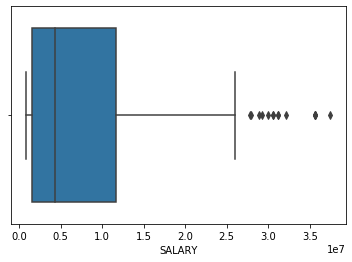

In [10]:
ax = sns.boxplot(x=df['SALARY'])

#### Com o gráfico boxplot acima, é fácil observar que os valores outliers estão entre 2.6, à 3.5, para identificar os quais são esses outliers, iremos usar a abordagem z-score

Formula z-score $$z = {{x-\sigma}  \over \mu} = {{1800 - 1500} \over 300} = 1.$$

In [11]:
# Z-score para detectar outlier
def detect_outlier(df):
    outliers=[]
    threshold=3
    mean_1 = np.mean(df)
    std_1 =np.std(df)
    
    
    for y in df:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
            
    return outliers

In [12]:
detect_outlier(df["SALARY"])

[37457154.0, 35654150.0, 32088932.0, 35650150.0, 35654150.0, 35654150.0]

In [13]:
df[df['SALARY'].isin(detect_outlier(df["SALARY"]))]

,TEAM,NAME,EXPERIENCE,URL,POSITION,AGE,HT,WT,COLLEGE,SALARY,...,BLKPG,STLPG,TOPG,PPG,THM,THA,FTM,FTA,FGM,FGA
103,Golden State Warriors,Stephen Curry,9,http://www.espn.com/nba/player/_/id/3975,PG,30,190.50,85.97,Davidson,37457154.0,...,0.2,1.8,3.2,23.1,3.4,7.8,3.6,4.0,8.0,16.8
147,Los Angeles Lakers,LeBron James,15,http://www.espn.com/nba/player/_/id/1966,SF,33,203.20,113.12,-,35654150.0,...,0.8,1.6,3.5,27.2,1.4,4.1,6.0,8.1,9.9,19.6
230,Detroit Pistons,Blake Griffin,8,http://www.espn.com/nba/player/_/id/3989,PF,29,208.28,113.12,Oklahoma,32088932.0,...,0.5,0.9,2.5,21.5,0.4,1.1,4.7,6.9,8.2,16.1
306,Houston Rockets,James Harden,9,http://www.espn.com/nba/player/_/id/3992,PG,29,195.58,99.55,Arizona State,35650150.0,...,0.5,1.5,3.5,23.0,2.4,6.6,7.1,8.3,6.8,15.3
310,Houston Rockets,Chris Paul,13,http://www.espn.com/nba/player/_/id/2779,PG,33,182.88,79.19,Wake Forest,35654150.0,...,0.1,2.3,2.4,18.7,1.3,3.4,4.3,4.9,6.6,13.9
510,Oklahoma City Thunder,Russell Westbrook,10,http://www.espn.com/nba/player/_/id/3468,PG,29,190.50,90.50,UCLA,35654150.0,...,0.3,1.7,4.0,23.0,1.1,3.5,5.9,7.2,8.0,18.4


#### identificamos que a coluna SALARY possui outliers e portanto, faz mais sentido utilizar a mediana para a substituição dos NaNs, pois é menos sensivel aos outliers.

In [14]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['SALARY']] = imputer.fit_transform(df[['SALARY']])

In [15]:
df.isna().sum()

TEAM                0
NAME                0
EXPERIENCE          0
URL                 0
POSITION            0
AGE                 0
HT                  0
WT                  0
COLLEGE             0
SALARY              0
PPG_LAST_SEASON    12
APG_LAST_SEASON    12
RPG_LAST_SEASON    12
PER_LAST_SEASON    12
PPG_CAREER          0
APG_CAREER          0
RGP_CAREER          0
GP                  0
MPG                 0
FGM_FGA             0
FGP                 0
THM_THA             0
THP                 0
FTM_FTA             0
FTP                 0
APG                 0
BLKPG               0
STLPG               0
TOPG                0
PPG                 0
THM                 0
THA                 0
FTM                 0
FTA                 0
FGM                 0
FGA                 0
dtype: int64

#### Verifica se as colunas descritas abaixo, utilizando o botplot, também possuem outliers.

[Text(0, 0, 'PPG_LAST_SEASON'),
 Text(0, 0, 'APG_LAST_SEASON'),
 Text(0, 0, 'RPG_LAST_SEASON'),
 Text(0, 0, 'PER_LAST_SEASON')]

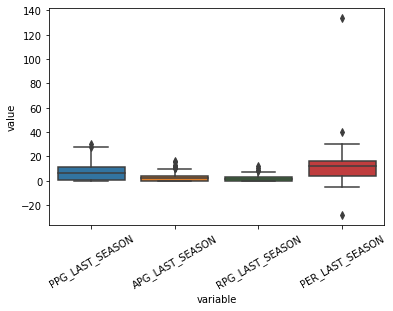

In [16]:
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df[[
                                                      'PPG_LAST_SEASON', 
                                                      'APG_LAST_SEASON', 
                                                      'RPG_LAST_SEASON',
                                                      'PER_LAST_SEASON']]))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

#### Como podemos perceber com o gráfico acima, as colunas possuem outliers sim e portanto, iremos substituir pela mediana, como mostra no código abaixo.

In [17]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[['PPG_LAST_SEASON', 'APG_LAST_SEASON', 'RPG_LAST_SEASON', 'PER_LAST_SEASON']] = ( 
                                                 imputer.fit_transform(df[['PPG_LAST_SEASON']]),  
                                                 imputer.fit_transform(df[['APG_LAST_SEASON']]), 
                                                 imputer.fit_transform(df[['RPG_LAST_SEASON']]), 
                                                 imputer.fit_transform(df[['PER_LAST_SEASON']]) 
                                             )
df['AGE'] 

0      31
1      22
2      24
3      21
4      21
       ..
545    25
546    25
547    27
548    34
549    31
Name: AGE, Length: 550, dtype: int32

#### Verifica se o dataset ainda possui algum outlier

In [18]:
df.isna().sum()

TEAM               0
NAME               0
EXPERIENCE         0
URL                0
POSITION           0
AGE                0
HT                 0
WT                 0
COLLEGE            0
SALARY             0
PPG_LAST_SEASON    0
APG_LAST_SEASON    0
RPG_LAST_SEASON    0
PER_LAST_SEASON    0
PPG_CAREER         0
APG_CAREER         0
RGP_CAREER         0
GP                 0
MPG                0
FGM_FGA            0
FGP                0
THM_THA            0
THP                0
FTM_FTA            0
FTP                0
APG                0
BLKPG              0
STLPG              0
TOPG               0
PPG                0
THM                0
THA                0
FTM                0
FTA                0
FGM                0
FGA                0
dtype: int64

#### Pronto, as colunas SALARY, PPG_LAST_SEASON, APG_LAST_SEASON, RPG_LAST_SEASON, e PER_LAST_SEASON que possuiam NaNs, foram substituidas pelas suas respectivas medianas, para assim, não serem descartadas do DATASET.

In [19]:
df['AGE'].min()

18

#### Verificando o percentual de jogadores experiêntes na temporada.

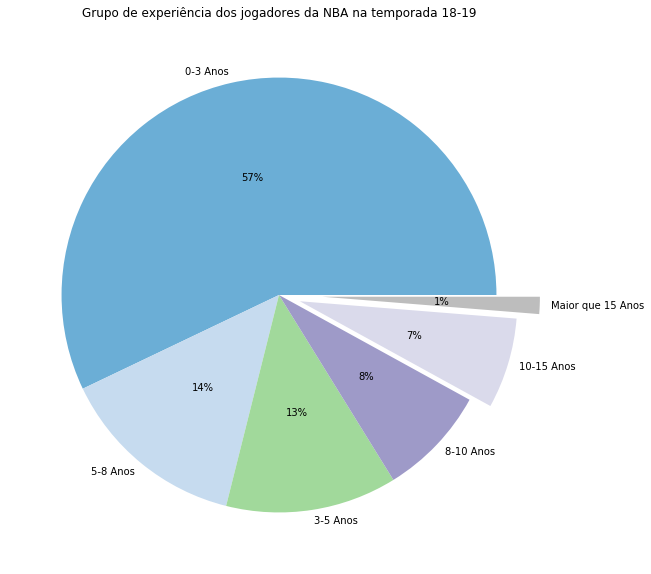

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))

experiencia_grupos = df['EXPERIENCE'].value_counts(bins=[0, 3, 5, 8, 10, 15, 25]).values
labels = ['0-3 Anos', '5-8 Anos', '3-5 Anos', '8-10 Anos', '10-15 Anos', 'Maior que 15 Anos']
explodes = (0, 0, 0, 0, 0.1, 0.2)
cmap = plt.get_cmap("tab20c")
cores = cmap(np.array([1, 3, 10, 13, 15, 18]))

ax = plt.pie(experiencia_grupos, labels=labels, autopct='%1.0f%%', colors=cores, 
             pctdistance=.55, explode=explodes, labeldistance=1.05)
plt.title('Grupo de experiência dos jogadores da NBA na temporada 18-19', fontsize=12);

#### Universidades que mais contribuêm com os talentos para NBA. 

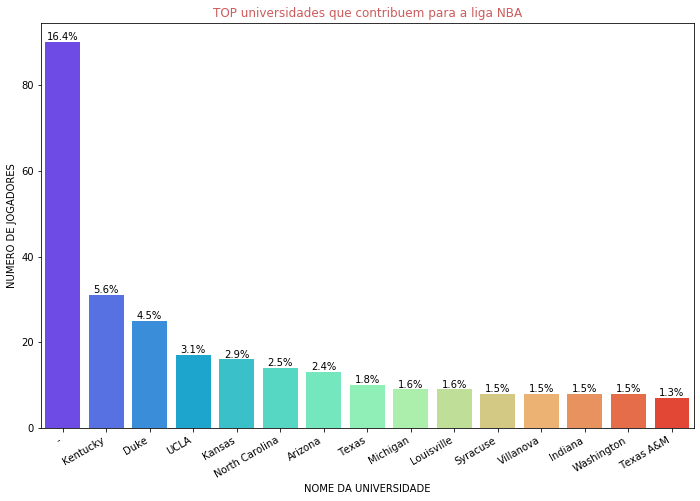

In [21]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

ncount = len(df.COLLEGE)
orders = df['COLLEGE'].value_counts().iloc[:15].index.tolist()
ax = sns.countplot(x='COLLEGE', data=df, order=orders, palette="rainbow")


ax.set_title('TOP universidades que contribuem para a liga NBA', color='indianred', fontsize=12)
ax.set_xlabel('NOME DA UNIVERSIDADE')
ax.set_ylabel('NUMERO DE JOGADORES')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')
fig.autofmt_xdate()

In [22]:
x = df[['TEAM', 'SALARY']].groupby('TEAM').sum().reset_index()
fig = px.bar(x, x='TEAM', y='SALARY',
             hover_data=['TEAM', 'SALARY'], color='SALARY',
             height=500)
#fig.show()
py.iplot(fig)

In [23]:
x = df[['POSITION', 'SALARY']].groupby('POSITION').sum().reset_index()
fig = px.bar(x, x='POSITION', y='SALARY',
             hover_data=['POSITION', 'SALARY'], color='SALARY',
             labels={'pop':'population of Canada'}, height=500)
py.iplot(fig)
#fig.show()

#### Com os gráficos acima, fica claro que os jogadores mais bem pagos tem as seguintes caracteristicas, joga em um dos dois times mais caros da liga e joga na posição PG

#### Categorizando variáveis nominais.

In [24]:
le = preprocessing.LabelEncoder()
df['POS_CATEGORICAL'] = le.fit(df['POSITION']).transform(df['POSITION'])
df['TEAM_CATEGORICAL'] = le.fit(df['TEAM']).transform(df['TEAM'])
df['COLLEGE_CATEGORICAL'] = le.fit(df['COLLEGE']).transform(df['COLLEGE'])

In [25]:
x_colunas = ['TEAM', 'NAME', 'URL', 
             'POSITION', 'COLLEGE', 
             'FGM_FGA', 'THM_THA', 'FTM_FTA', 'SALARY']
             #'TEAM_CATEGORICAL', 'COLLEGE_CATEGORICAL',
             #'HT', 'POS_CATEGORICAL', 'THM', 'WT']

y_colunas = ['SALARY']
df_x_train = df[df.columns.difference(x_colunas)].astype(float)
df_y_train = df[y_colunas].astype(int)

In [26]:
df_x_train

,AGE,APG,APG_CAREER,APG_LAST_SEASON,BLKPG,COLLEGE_CATEGORICAL,EXPERIENCE,FGA,FGM,FGP,...,PPG_LAST_SEASON,RGP_CAREER,RPG_LAST_SEASON,STLPG,TEAM_CATEGORICAL,THA,THM,THP,TOPG,WT
0,31.0,0.7,0.7,1.1,0.5,124.0,6.0,4.3,2.2,0.502,...,6.0,4.4,5.4,0.2,1.0,0.1,0.0,0.143,0.8,117.65
1,22.0,0.0,0.0,0.0,0.0,121.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000,0.0,99.55
2,24.0,0.6,0.6,0.6,0.1,16.0,1.0,2.0,1.2,0.577,...,3.0,1.5,1.5,0.2,1.0,0.5,0.2,0.429,0.6,89.59
3,21.0,1.2,1.2,1.6,0.3,16.0,2.0,8.3,3.8,0.461,...,14.5,3.8,4.9,0.7,1.0,3.0,1.1,0.379,1.3,99.55
4,21.0,0.0,0.0,0.0,0.0,98.0,1.0,1.0,0.5,0.500,...,1.0,0.5,0.5,0.0,1.0,0.0,0.0,0.000,0.5,92.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,25.0,0.3,0.3,0.3,0.0,47.0,2.0,1.5,0.4,0.277,...,1.0,0.8,1.0,0.2,28.0,0.5,0.0,0.063,0.3,104.07
546,25.0,1.4,1.4,1.4,0.2,6.0,1.0,4.1,1.7,0.423,...,5.0,3.4,3.4,0.5,28.0,1.7,0.6,0.356,0.8,102.26
547,27.0,7.9,7.9,5.3,0.1,0.0,7.0,9.0,3.4,0.385,...,13.1,4.3,4.6,2.0,28.0,2.4,0.8,0.325,2.8,85.97
548,34.0,1.5,1.5,0.9,0.4,0.0,12.0,5.2,2.3,0.449,...,8.2,3.9,4.2,1.1,28.0,1.7,0.6,0.347,0.9,99.55


#### Plota a matriz de correlação

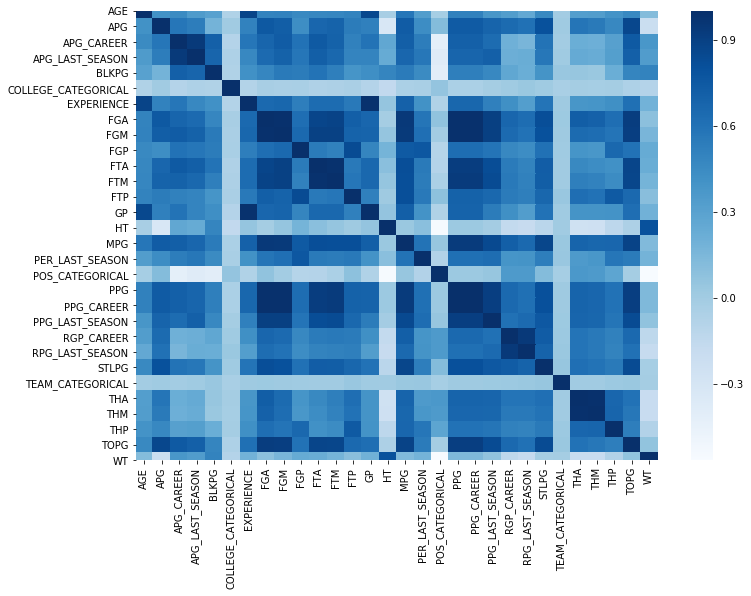

In [27]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
corr = df_x_train.corr()

sns.heatmap(corr, cmap = 'Blues',
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#### Como não sabemos quais variáveis iremos inputar no modelo, utilizando o metodo Feature importance (Importancia da variável), ela nos trará insights de variáveis que são supostamente irrelevantes para o modelo. Obs: Não é porque  esse método mostre que a variável não seja importante para o modelo, não significa dizer que isso seja verdade.

#### O exemplo que irei mostrar aqui é o SelectKbest do modulo features_selection do sklearn, que utiliza testes estatisticos univariados. Irei considerar apenas as variáveis onde sua importância seja maior que 10% para o modelo.

Feature ('COLLEGE_CATEGORICAL', 0.03748018196497771)
Feature ('HT', 0.07104232599804661)
Feature ('POS_CATEGORICAL', 0.03403164902002853)
Feature ('TEAM_CATEGORICAL', 0.0)
Feature ('THM', 0.06225311248932819)
Feature ('WT', 0.06904777820801966)


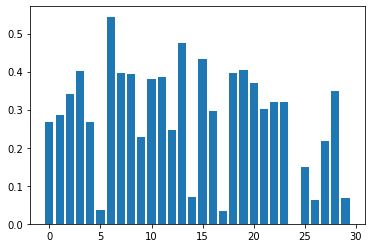

In [28]:
# Selecao de feature
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

X_train, X_test, y_train, y_test = train_test_split(df_x_train, df_y_train, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Scores para cada feature 
for i in range(len(fs.scores_)):
    if (fs.scores_[i] * 100) < 10:
        print(f'Feature {df_x_train.columns[i], fs.scores_[i]}')
#plot scores 
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#### Como podemos ver acima, as variáveis COLLEGE_CATEGORICAL,  HT, POS_CATEGORICAL, TEAM_CATEGORICAL, THM e WT são as menos importantes para o modelo e portanto, ficarão de fora do modelo, isso porque definimos um limiar de 10%.

In [29]:
x_colunas = ['TEAM', 'NAME', 'URL', 
             'POSITION', 'COLLEGE', 
             'FGM_FGA', 'THM_THA', 'FTM_FTA', 'SALARY',
             'TEAM_CATEGORICAL', 'COLLEGE_CATEGORICAL',
             'HT', 'POS_CATEGORICAL', 'THM', 'WT']
jogador = df.sort_values(by='SALARY', ascending=False).head(1)
df_x_train = df[df.columns.difference(x_colunas)].astype(float)
stepen_curry = jogador[df.columns.difference(x_colunas)].astype(float)

In [30]:
df[df.columns.difference(x_colunas)]

,AGE,APG,APG_CAREER,APG_LAST_SEASON,BLKPG,EXPERIENCE,FGA,FGM,FGP,FTA,...,PER_LAST_SEASON,PPG,PPG_CAREER,PPG_LAST_SEASON,RGP_CAREER,RPG_LAST_SEASON,STLPG,THA,THP,TOPG
0,31,0.7,0.7,1.1,0.5,6,4.3,2.2,0.502,1.3,...,12.09,5.4,5.4,6.0,4.4,5.4,0.2,0.1,0.143,0.8
1,22,0.0,0.0,0.0,0.0,0,0,0,0.000,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000,0.0
2,24,0.6,0.6,0.6,0.1,1,2.0,1.2,0.577,1.0,...,12.18,3.0,3.0,3.0,1.5,1.5,0.2,0.5,0.429,0.6
3,21,1.2,1.2,1.6,0.3,2,8.3,3.8,0.461,2.4,...,13.69,10.4,10.4,14.5,3.8,4.9,0.7,3.0,0.379,1.3
4,21,0.0,0.0,0.0,0.0,1,1.0,0.5,0.500,0.0,...,-4.82,1.0,1.0,1.0,0.5,0.5,0.0,0.0,0.000,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,25,0.3,0.3,0.3,0.0,2,1.5,0.4,0.277,0.1,...,9.22,0.9,0.9,1.0,0.8,1.0,0.2,0.5,0.063,0.3
546,25,1.4,1.4,1.4,0.2,1,4.1,1.7,0.423,1.1,...,10.84,5.0,5.0,5.0,3.4,3.4,0.5,1.7,0.356,0.8
547,27,7.9,7.9,5.3,0.1,7,9.0,3.4,0.385,3.8,...,15.43,10.8,10.8,13.1,4.3,4.6,2.0,2.4,0.325,2.8
548,34,1.5,1.5,0.9,0.4,12,5.2,2.3,0.449,1.1,...,15.86,6.1,6.1,8.2,3.9,4.2,1.1,1.7,0.347,0.9


In [31]:
stepen_curry

,AGE,APG,APG_CAREER,APG_LAST_SEASON,BLKPG,EXPERIENCE,FGA,FGM,FGP,FTA,...,PER_LAST_SEASON,PPG,PPG_CAREER,PPG_LAST_SEASON,RGP_CAREER,RPG_LAST_SEASON,STLPG,THA,THP,TOPG
103,30.0,6.8,6.8,6.1,0.2,9.0,16.8,8.0,0.477,4.0,...,28.32,23.1,23.1,26.4,4.4,5.1,1.8,7.8,0.436,3.2


### Treinamento e teste do modelo.

#### Com o estudo dos dados até aqui, foi possível identificar que os dados do dataset em questão, são bastante díspares e portanto, precisará ser feito uma normalização.

#### Sobre os algoritmos de normalização, citarei alguns aqui, são eles: 
    1. StandardScaler: A ideia por trás StandardScaleré que ele irá transformar seus dados de forma que sua distribuição tenha um valor médio 0 e desvio padrão de 1.
    2. MinMaxScaler: O MinMaxScaler transforma recursos dimensionando cada recurso para uma determinada gama. Esse intervalo pode ser definido especificando o parâmetro feature_range (padrão em (0,1)). Este scaler funciona melhor para casos em que a distribuição não é gaussiana ou o desvio padrão é muito pequeno. No entanto, é sensível a outliers, por isso, se há outliers nos dados, você pode querer considerar outro scaler.
    3. Ao contrário dos scalers anteriores, as estatísticas de centralidade e escalação do RobustScaler são baseadas em percentis e, portanto, não são influenciadas por um número de grandes outliers marginais
    
#### Para este nosso exemplo, iremos utilizar o RobustScaler, visto que nosso dataset tem bastante outliers
Formula RobustScaler $$X_{scale} = {{x_i-x_{med}}  \over x_{75} - x_{25}} $$

In [32]:
#MinMaxScaler
#StandardScaler
#RobustScaler
scalerx = RobustScaler().fit(df_x_train)
scalery = RobustScaler().fit(df_y_train)

X_scaler = scalerx.fit_transform(df_x_train)
Y_scaler = scalery.fit_transform(df_y_train)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaler, Y_scaler, test_size=0.33, random_state=0)
#X_train, X_test, fs = select_features(X_train, Y_train, X_test)
X = X_train 
Y = Y_train


LR = LinearRegression().fit(X, Y)
LRSvm = svm.SVR(kernel='rbf', degree=3).fit(X, Y)
LRSGDRegressor = linear_model.SGDRegressor(loss="squared_loss", penalty="l2", max_iter=1000).fit(X, Y)   

#### Estou utilizando 3 modelos, LinerRegression, SVM (KERNEL='rbf') e SGDRegressor, para fazer uma comparação entre eles.

In [33]:
def resultado_predicao_modelo(modelo):
    dict_modelo = {}

    y_pred = modelo.predict(scalerx.fit_transform(X_test))
    df_resultado = pd.DataFrame()
    df_resultado['Atual'] = np.squeeze(scalery.inverse_transform(Y_test))
    df_resultado['Predito'] = np.round(scalery.inverse_transform(y_pred.reshape(1, -1))[0], 1)

    return  df_resultado.astype(float)
    

In [34]:
#Mean Absolute Error
#Mean Squared Error
#Root Mean Squared Error

def plot_resultado_modelo(modelo):
    dict_modelo = {}
    
    y_pred = modelo.predict(scalerx.fit_transform(X_test))
    dict_modelo['MODELO'] = str(modelo)[0: -2]
    dict_modelo['SCORE'] = round(modelo.score(X, Y), 2)
    dict_modelo['INTERCEPT'] = round(modelo.intercept_[0], 2)
    dict_modelo['MAE'] = round(metrics.mean_absolute_error(Y_test, y_pred), 2)
    dict_modelo['MSE'] = round(metrics.mean_squared_error(Y_test, y_pred), 2)
    dict_modelo['RMSE'] = round(np.sqrt(metrics.mean_squared_error(Y_test, y_pred)), 2)
    
        
    df_modelo = pd.DataFrame([dict_modelo])
    
    ax1 = sns.distplot(Y_test, hist=False, color="r", label="Valor atual")
    plot = sns.distplot(y_pred, hist=False, color="b", label="Valores preditos" , ax=ax1)
    
    resultado_pred = resultado_predicao_modelo(modelo)
    Y_atual = resultado_pred['Atual']
    Y_pred = resultado_pred['Predito']

    fig, ax = plt.subplots()
    ax.scatter(Y_atual, Y_pred)
    ax.plot([Y_atual.min(), Y_atual.max()], [Y_atual.min(), Y_atual.max()], 'k--', lw=4)
    ax.set_xlabel('Atual')
    ax.set_ylabel('Predito')
    

    return df_modelo, plot, ax
    

#### Modelo 1: LinearRegression

,MODELO,SCORE,INTERCEPT,MAE,MSE,RMSE
0,LinearRegression,0.6,-0.22,0.58,0.66,0.81


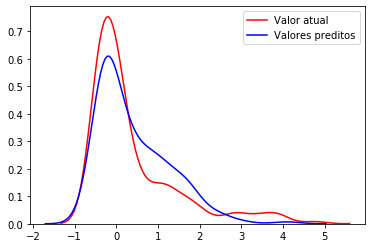

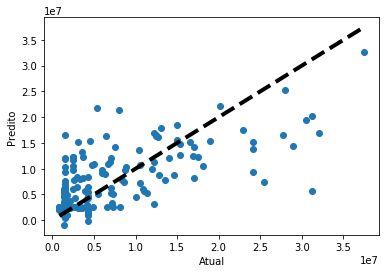

In [35]:
plot_resultado_modelo(LR)[0]

<a id="modelo_svm1"></a>
#### Modelo 2: SVM Regression (Kernel='rbf')

,MODELO,SCORE,INTERCEPT,MAE,MSE,RMSE
0,SVR,0.73,0.74,0.44,0.46,0.68


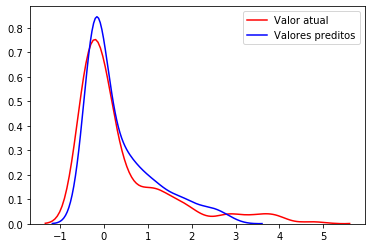

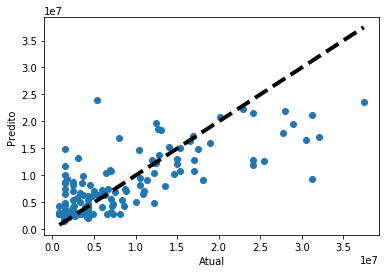

In [36]:
plot_resultado_modelo(LRSvm)[0]

#### Modelo 3: SGDRegressor

,MODELO,SCORE,INTERCEPT,MAE,MSE,RMSE
0,SGDRegressor,0.55,-0.07,0.58,0.64,0.8


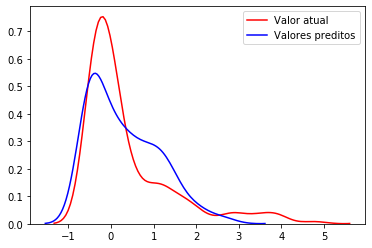

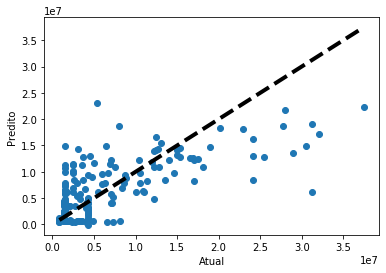

In [37]:
plot_resultado_modelo(LRSGDRegressor)[0]

#### Podemos observar que, dentre os 3 modelos, o melhor que se adequou aos dados foi o SVM (Suport Vector Machine) perdendo apenas na "Interceção"  para o modelo LinearRegression e SGDRegressor. Abaixo, os resultados transcritos:
    1. Score: 0.73
    2. Erro Médio Absoluto (MAE): 0.44
    3. Erro Médio Quadrado (MSE): 0.46 
    4. Raiz Quadrada do Erro Médio(RMSE): 0.68

In [38]:
x_ = scalerx.fit_transform(np.reshape(stepen_curry, (1, -1)))

result_lr_modelo = round(scalery.inverse_transform(LR.predict(x_))[0][0], 2) 
result_lr_svm = round(scalery.inverse_transform(LRSvm.predict(x_).reshape(1, -1))[0][0], 2)
result_lr_sgdregressor = round(scalery.inverse_transform(LRSGDRegressor.predict(x_).reshape(1, -1))[0][0], 2)

result_lr_test_modelo = round(scalery.inverse_transform(LR.predict(X_test))[0][0], 2) 
result_lr_svm_test = round(scalery.inverse_transform(LRSvm.predict(X_test).reshape(1, -1))[0][0], 2)
result_lr_sgdregressor_test = round(scalery.inverse_transform(LRSGDRegressor.predict(X_test).reshape(1, -1))[0][0], 2)

salario_stepen = jogador['SALARY'].values[0]

print(f'Testando o modelo LinearRegression com dados de teste e predizendo: {result_lr_test_modelo}')
print(f'Testando o modelo SVM com dados de teste e predizendo: {result_lr_svm_test}')
print(f'Testando o modelo SGDREGRESSOR com dados de teste e predizendo: {result_lr_sgdregressor_test}')

print(f'\nSalário predito no modelo LinearRegression : { result_lr_modelo } X Salario Stepen Curry: {salario_stepen}') 
print(f'Salário predito no modelo SVM (rbf): {result_lr_modelo} X Salario Stepen Curry: {salario_stepen}')      
print(f'Salário predito no modelo SGDRegressor: {result_lr_sgdregressor} X Salario Stepen Curry: {salario_stepen}')


Testando o modelo LinearRegression com dados de teste e predizendo: 619321.35
Testando o modelo SVM com dados de teste e predizendo: 2800596.02
Testando o modelo SGDREGRESSOR com dados de teste e predizendo: 1717603.98

Salário predito no modelo LinearRegression : 2824281.49 X Salario Stepen Curry: 37457154.0
Salário predito no modelo SVM (rbf): 2824281.49 X Salario Stepen Curry: 37457154.0
Salário predito no modelo SGDRegressor: 3882170.0 X Salario Stepen Curry: 37457154.0


#### Interessante notar que, o modelo LinearRegression e SVM predizeram que o Stepen tem um sálario de R$2824281.49 e enquanto que o modelo SGDRegressor, conseguiu apróximar melhor do salário real do jogador.

### Pelo fato do modelo ter bastante outliers iremos agora fazer um teste retirando os outliers do dataset e retreinar o modelo. E para isso, iremos utilizar o Z-score do modulo scipy. O código está descrito em algumas páginas acima.

In [39]:
from scipy import stats

x_colunas = ['TEAM', 'NAME', 'URL', 'POSITION', 'COLLEGE', 
             'FGM_FGA', 'THM_THA', 'FTM_FTA', #'SALARY',
             'TEAM_CATEGORICAL', 'COLLEGE_CATEGORICAL',
            'HT', 'POS_CATEGORICAL', 'THM', 'WT']

y_colunas = ['SALARY']

x_df = df[df.columns.difference(x_colunas)].astype(float)
z = np.abs(stats.zscore(x_df))

In [40]:
df[df.columns.difference(x_colunas)].astype(float)

,AGE,APG,APG_CAREER,APG_LAST_SEASON,BLKPG,EXPERIENCE,FGA,FGM,FGP,FTA,...,PPG,PPG_CAREER,PPG_LAST_SEASON,RGP_CAREER,RPG_LAST_SEASON,SALARY,STLPG,THA,THP,TOPG
0,31.0,0.7,0.7,1.1,0.5,6.0,4.3,2.2,0.502,1.3,...,5.4,5.4,6.0,4.4,5.4,5193600.0,0.2,0.1,0.143,0.8
1,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,4335250.0,0.0,0.0,0.000,0.0
2,24.0,0.6,0.6,0.6,0.1,1.0,2.0,1.2,0.577,1.0,...,3.0,3.0,3.0,1.5,1.5,1349464.0,0.2,0.5,0.429,0.6
3,21.0,1.2,1.2,1.6,0.3,2.0,8.3,3.8,0.461,2.4,...,10.4,10.4,14.5,3.8,4.9,5169960.0,0.7,3.0,0.379,1.3
4,21.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,0.500,0.0,...,1.0,1.0,1.0,0.5,0.5,4335250.0,0.0,0.0,0.000,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,25.0,0.3,0.3,0.3,0.0,2.0,1.5,0.4,0.277,0.1,...,0.9,0.9,1.0,0.8,1.0,1512601.0,0.2,0.5,0.063,0.3
546,25.0,1.4,1.4,1.4,0.2,1.0,4.1,1.7,0.423,1.1,...,5.0,5.0,5.0,3.4,3.4,1378242.0,0.5,1.7,0.356,0.8
547,27.0,7.9,7.9,5.3,0.1,7.0,9.0,3.4,0.385,3.8,...,10.8,10.8,13.1,4.3,4.6,14975000.0,2.0,2.4,0.325,2.8
548,34.0,1.5,1.5,0.9,0.4,12.0,5.2,2.3,0.449,1.1,...,6.1,6.1,8.2,3.9,4.2,5250000.0,1.1,1.7,0.347,0.9


#### Filtra todas as linhas que ultrapassam o limiar de 3 desvios padrão dos dados. Todas as linhas que ultrapassarem esse limiar, serão retiradas do dataset.

In [41]:
x_colunas.append('SALARY')
new_df = x_df[(z < 3).all(axis=1)]
df_x_train = new_df[new_df.columns.difference(x_colunas)].astype(float)
df_y_train = new_df[y_colunas].astype(int)


In [42]:
df_x_train

,AGE,APG,APG_CAREER,APG_LAST_SEASON,BLKPG,EXPERIENCE,FGA,FGM,FGP,FTA,...,PER_LAST_SEASON,PPG,PPG_CAREER,PPG_LAST_SEASON,RGP_CAREER,RPG_LAST_SEASON,STLPG,THA,THP,TOPG
0,31.0,0.7,0.7,1.1,0.5,6.0,4.3,2.2,0.502,1.3,...,12.09,5.4,5.4,6.0,4.4,5.4,0.2,0.1,0.143,0.8
1,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0
2,24.0,0.6,0.6,0.6,0.1,1.0,2.0,1.2,0.577,1.0,...,12.18,3.0,3.0,3.0,1.5,1.5,0.2,0.5,0.429,0.6
3,21.0,1.2,1.2,1.6,0.3,2.0,8.3,3.8,0.461,2.4,...,13.69,10.4,10.4,14.5,3.8,4.9,0.7,3.0,0.379,1.3
4,21.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,0.500,0.0,...,-4.82,1.0,1.0,1.0,0.5,0.5,0.0,0.0,0.000,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,26.0,1.7,1.7,1.8,0.1,3.0,4.1,1.8,0.439,0.7,...,11.91,4.7,4.7,4.5,1.2,1.2,0.6,1.5,0.388,1.0
545,25.0,0.3,0.3,0.3,0.0,2.0,1.5,0.4,0.277,0.1,...,9.22,0.9,0.9,1.0,0.8,1.0,0.2,0.5,0.063,0.3
546,25.0,1.4,1.4,1.4,0.2,1.0,4.1,1.7,0.423,1.1,...,10.84,5.0,5.0,5.0,3.4,3.4,0.5,1.7,0.356,0.8
548,34.0,1.5,1.5,0.9,0.4,12.0,5.2,2.3,0.449,1.1,...,15.86,6.1,6.1,8.2,3.9,4.2,1.1,1.7,0.347,0.9


In [43]:
print(f'Tamanho do Dataset antes {x_df.shape[0]} e depois {new_df.shape[0]} da retirada dos outliers')

Tamanho do Dataset antes 550 e depois 499 da retirada dos outliers


#### No exemplo anterior, utilizandos o normalizador RobustoScaler, neste exemplo, iremos utilizar o MinMaxScaler, visto que nossos dados não possuem mais outliers.

In [44]:
scalerx = MinMaxScaler().fit(df_x_train)
scalery = MinMaxScaler().fit(df_y_train)

X_scaler = scalerx.fit_transform(df_x_train)
Y_scaler = scalery.fit_transform(df_y_train)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaler, Y_scaler, test_size=0.33, random_state=100)
#X_train, X_test, fs = select_features(X_train, Y_train, X_test)
X = X_train 
Y = Y_train


LR = LinearRegression().fit(X, Y)
LRSvm = svm.SVR(kernel='rbf', degree=3).fit(X, Y)
LRSGDRegressor = linear_model.SGDRegressor(loss="squared_loss", penalty="l2", max_iter=100).fit(X, Y)  

,MODELO,SCORE,INTERCEPT,MAE,MSE,RMSE
0,LinearRegression,0.51,0.16,0.12,0.03,0.17


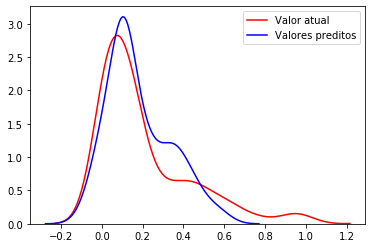

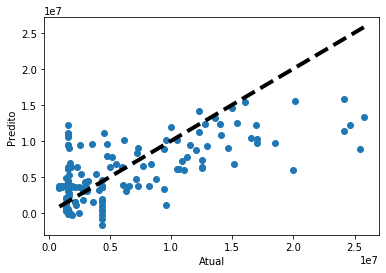

In [45]:
plot_resultado_modelo(LR)[0]

#### O modelo acima comparado ao modelo anterior, ele teve uma piora no score, mas uma melhora considerável no erro absoluto e erro quadratico médio.

,MODELO,SCORE,INTERCEPT,MAE,MSE,RMSE
0,SVR,0.76,0.18,0.11,0.02,0.15


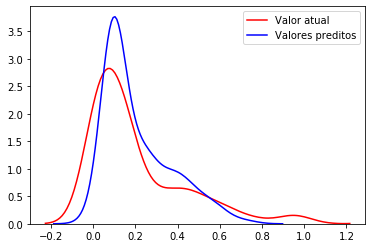

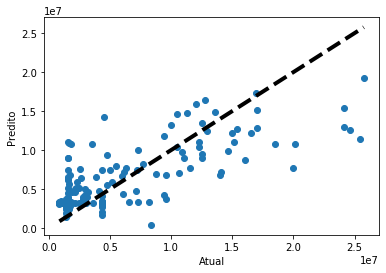

In [46]:
plot_resultado_modelo(LRSvm)[0]

#### O modelo SVM acima, comparado ao modelo anterior ([Modelo 2: SVM Regression (Kernel='rbf')](#modelo_svm1)), ele teve uma melhora no score , saindo de 0.73, para 0.76 e uma melhora também no Erro médio Absoluto e Erro quadrático médio.

,MODELO,SCORE,INTERCEPT,MAE,MSE,RMSE
0,SGDRegressor(max_iter=10,0.36,0.04,0.14,0.03,0.18


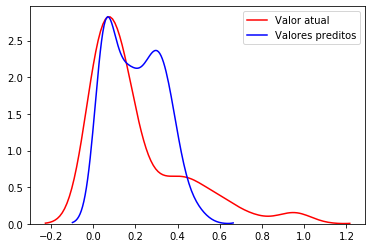

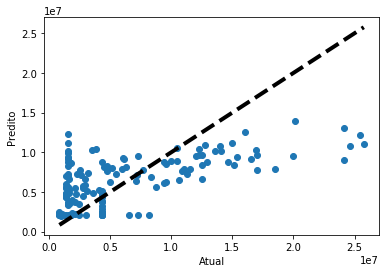

In [47]:
plot_resultado_modelo(LRSGDRegressor)[0]

#### Já o modelo SGDRegressor, com os mesmos parametros do modelo anterior, piorou um pouco o score, caindo de 0.55, para 0.36, porém, houve uma melhora de 0.58 para 0.14 no Erro médio Absoluto e 0.64 para 0.03, no Erro médio quadrático.

#### Retirando os outliers dos dados, os 3 modelos tiveram melhoras consideráveis, apenas o modelo 3 SGDRegressor que continua com um score baixo, mas as outras medidas (INTERCEPT, MAE, MSE, RMSE), melhoraram. 

### Iremos agora, fazer uma validação cruzada com os 3 modelos utilizando K-Fold. 

In [48]:
# Faz validação cruzada
def gera_score (modelo, X_train, y_train, X_test, y_test):
    score_train = modelo.score(X_train, y_train)
    score_test = modelo.score(X_test, y_test)
    
    y_pred = modelo.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    #print(f'{modelo} => Score treinamento:{round(score_train * 100, 2)}%, Score teste :{round(score_test * 100, 2)}%' )
    return modelo, \
                 round(score_train * 100, 2), \
                 round(score_test * 100, 2),\
                 round(mae * 100, 2)
                 
#Gera DF de validação cruzada dos dados.
def compara_scores_train_test():
    lista = []    

    kf = KFold(n_splits=10)    
    modelos = ['LinearRegression', 'SVM', 'SGDRegressor']
    for modelo in modelos:
        
        for train_index, test_index in kf.split(X_scaler):
            dict_modelo = {}

            X_train, X_test = X_scaler[train_index], X_scaler[test_index]
            y_train, y_test = Y_scaler[train_index], Y_scaler[test_index]

            if modelo == 'LinearRegression':
                
                LR = LinearRegression().fit(X_train, y_train)
                retorno = gera_score(LR, X_train, y_train, X_test, y_test)

                dict_modelo['modelo'] = str(retorno[0])
                dict_modelo['score_train'] = str(retorno[1])
                dict_modelo['score_test'] = str(retorno[2])
                dict_modelo['MAE'] = str(retorno[3])
                lista.append(dict_modelo)
                
                

            if modelo == 'SVM':
                LRSvm = svm.SVR(kernel='rbf', degree=3).fit(X_train, y_train)
                retorno = gera_score(LRSvm, X_train, y_train, X_test, y_test)

                dict_modelo['modelo'] = str(retorno[0])
                dict_modelo['score_train'] = str(retorno[1])
                dict_modelo['score_test'] = str(retorno[2])
                dict_modelo['MAE'] = str(retorno[3])
                lista.append(dict_modelo)
                
                

            if modelo =='SGDRegressor':
                LRSgdRegressor = linear_model.SGDRegressor(loss="squared_loss", penalty="l2", max_iter=300).fit(X_train, y_train)
                retorno = gera_score(LRSgdRegressor, X_train, y_train, X_test, y_test)

                dict_modelo['modelo'] = str(retorno[0])
                dict_modelo['score_train'] = str(retorno[1])
                dict_modelo['score_test'] = str(retorno[2])
                dict_modelo['MAE'] = str(retorno[3])
                lista.append(dict_modelo)
         
                
    
    return pd.DataFrame(lista)


In [49]:
compara_scores_train_test()

,modelo,score_train,score_test,MAE
0,LinearRegression(),52.69,38.52,11.04
1,LinearRegression(),52.02,48.58,10.63
2,LinearRegression(),54.6,10.92,13.37
3,LinearRegression(),53.8,22.75,12.85
4,LinearRegression(),51.28,56.52,11.59
5,LinearRegression(),53.73,34.39,13.87
6,LinearRegression(),51.54,55.17,10.71
7,LinearRegression(),51.15,54.99,11.45
8,LinearRegression(),52.33,38.74,14.23
9,LinearRegression(),52.05,47.63,12.96


### Vejamos como fica a predição do salário do Stepen Curry, já com a retirada dos outliers do Dataset.

In [50]:
x_ = scalerx.fit_transform(np.reshape(stepen_curry, (1, -1)))

result_lr_modelo = round(scalery.inverse_transform(LR.predict(x_))[0][0], 2) 
result_lr_svm = round(scalery.inverse_transform(LRSvm.predict(x_).reshape(1, -1))[0][0], 2)
result_lr_sgdregressor = round(scalery.inverse_transform(LRSGDRegressor.predict(x_).reshape(1, -1))[0][0], 2)

salario_stepen = jogador['SALARY'].values[0]


print(f'Salário predito no modelo LinearRegression: { result_lr_modelo } X Salario Stepen Curry: {salario_stepen}') 
      
print(f'Salário predito no modelo SVM (rbf): {result_lr_modelo} X Salario Stepen Curry: {salario_stepen}')
      
print(f'Salário predito no modelo SGDRegressor: {result_lr_sgdregressor} X Salario Stepen Curry: {salario_stepen}')


Salário predito no modelo LinearRegression: 4935036.74 X Salario Stepen Curry: 37457154.0
Salário predito no modelo SVM (rbf): 4935036.74 X Salario Stepen Curry: 37457154.0
Salário predito no modelo SGDRegressor: 1912199.92 X Salario Stepen Curry: 37457154.0


###  Conclusão 
### Com todas essas validações, os modelos conseguiram atingir uma boa métrica e isso nos deixa uma dúvida; Será se da para melhorar os modelos, estressa-los, para que os mesmos consigam diminuir o erro e aumentar o score? 

### Dado as ánalises até aqui e com a predição do modelo, ficou claro que o sálario do Stephen Curry, não é justo! Uma boa prova disso é observarmos o gráfico de boxpot utilizando o z-score acima [Verificando se o dataset contem outliers](#Verificando-se-o-dataset-contem-outliers) , onde o salário do Stepen Curry, mais 13 jogadores, ultrapassam a média dos demais jogadores.

### Referencias

NBA deixa futebol 'comendo poeira', e Thunder é o time do mundo que melhor paga seus atletas
.ESPN. Disponível em: <http://www.espn.com.br/noticia/746207_nba-deixa-futebol-comendo-poeira-e-thunder-e-o-time-do-mundo-que-melhor-paga-seus-atletas>. Acesso em: 15 Abril. 2021. 

LinearRegression.SkLearn. Disponível em: <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>. Acesso em: 14 Abril. 2021. 

SGDRegressor.SkLearn. Disponível em: <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html>. Acesso em: 14 Abril. 2021. 

SVM.SkLearn. Disponível em: <https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html>. Acesso em: 14 Abril. 2021.

sklearn.model_selection.KFold.SkLearn. Disponível em: <https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html>. Acesso em: 14 Abril. 2021.


Learn linear regression using scikit-learn and NBA data: Data science with sports.towardsdatascience. Disponível em: <https://towardsdatascience.com/learn-linear-regression-using-scikit-learn-and-nba-data-data-science-with-sports-9908b0f6a031>. Acesso em: 10  Abril. 2021. 


Bar Charts in Python.Plotly. Disponível em: <https://plotly.com/python/bar-charts/>. Acesso em: 11 Abril. 2021.

Line Charts in Python.Plotly. Disponível em: <https://plotly.com/python/line-charts/>. Acesso em: 11 Abril. 2021. 

Pandas.Pandas. Disponível em: <https://pandas.pydata.org/>. Acesso em: 10 Abril. 2021. 




